# Electronic band structure of graphene
This notebook will introduce you to the most typical analysis of electronic structure: Bands, fatbands and projected density of states.

We will do the analysis for graphene on the results of a SIESTA simulation, in a way similar to that done in the official tutorial: 
https://sisl.readthedocs.io/en/v0.11.0/tutorials/tutorial_siesta_2.html

For your reference, some Graphene literature:

**Lecture Notes on Graphene**
https://www.researchgate.net/publication/260421073_Lecture_Notes_on_Graphene

**Notes on graphene (nanophysics course)**
https://wiki.physics.udel.edu/phys824/Band_structure_of_graphene,_massless_Dirac_fermions_as_low-energy_quasiparticles,_Berry_phase,_and_all_that

For reference, this is the geometry of graphene
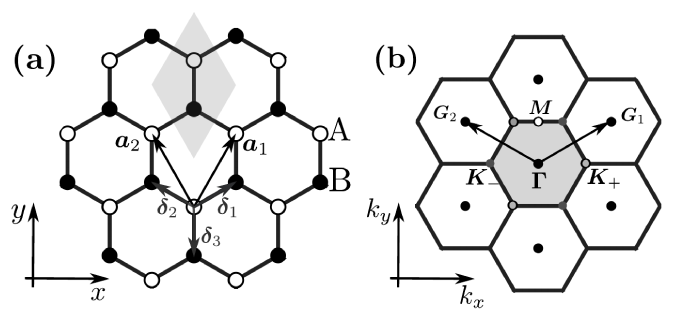


In [ ]:
import sisl
from sisl import *
import sisl.viz
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

## Create a graphene structure 
Create a graphene structure and save it for SIESTA calculation

In [ ]:
# Create a graphene structure with the default parameters.
graphene = sisl.geom.graphene()
# Plot it to see that it is what we wanted
graphene.plot(axes="x,y")

In [ ]:
graphene.write("structure.fdf")

**Now you can execute SIESTA and obtain the Hamiltonian for the electronic structure analysis**

Remember that you can make SIESTA write the final Hamiltonian with the flag:
```
TS.HS.Save true
```

in your fdf. 

**NOTE**: Use also `SaveRho true` in your fdf file to make SIESTA store the electronic density ($\rho$, rho), we will then display it just for fun, so that you can see how it can be done and what it looks like.

**NOTE 2**: The plots generated in this notebook are documented [here](https://zerothi.github.io/sisl/visualization/viz_module/index.html#showcase-of-plot-classes) in a very visual way. If you want to change the parameters, you can look at the documentation.

Run your calculation, and then use the next cells to get the analysis.

ANALYSIS OF BAND ELECTRONIC STRUCTURE 
-----
First of all, load your SIESTA results with

`H = sisl.get_sile("path/to/your.fdf").read_hamiltonian()`

In [ ]:
H = get_sile("run_1/graphene.fdf").read_hamiltonian()

And then perform the analysis using this notebook.

## Bands

Using sisl we can plot the graphene band structure following the same path as in the official SIESTA example $\Gamma > K > M > \Gamma$.

https://sisl.readthedocs.io/en/v0.11.0/tutorials/tutorial_siesta_2.html

Recall here these points:

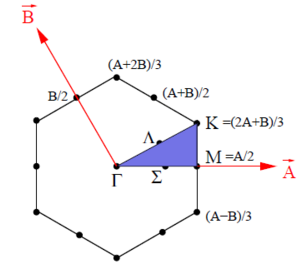

The result can be directly compared with published results such this one made with SIESTA by Boukhvalov et al., Phys. Rev. B 77, 035427 (2008) DOI: https://doi.org/10.1103/PhysRevB.77.035427  
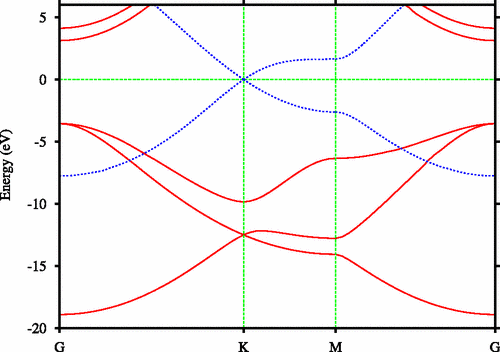!


In [ ]:
# We need to define a path of k points
band_struct = sisl.BandStructure(H, points=[[0, 0, 0], [2/3, 1/3, 0], [1/2, 1/2, 0],[1.0,1.0,0.0]],
    divisions=100, names=[r"G", "K", "M","G"]
)

In [ ]:
# Then we can plot the bands
band_struct.plot()

In [ ]:
band_struct.plot(Erange=[-22,10])

In [ ]:
band_struct.plot(Erange=[-22,10]).update_layout(height=500)

## Fatbands 

In fatbands, the width of each band represents the coefficient of a particular basis orbital for that band at that k-point. Usually, you draw multiple orbitals (or groups of orbitals), each in one colour. The **wider the band is for a given color, the more contribution of the orbital to the state** (bigger coefficient).

**Documentation in sisl**
https://sisl.readthedocs.io/en/v0.14.2/visualization/viz_module/showcase/FatbandsPlot.html

In [ ]:
# Get the fatbands plot
fatbands = band_struct.plot.fatbands(Erange=[-20,5])
# Split the contributions by the n and l quantum numbers
fatbands.split_groups(on="n+l")

In [ ]:
# Get the fatbands plot
fatbands = band_struct.plot.fatbands(Erange=[-21,10])
# Split the contributions by orbitals
fatbands.split_groups(on="orbitals")

This plot can be further customized, see here for more examples:

https://sisl.readthedocs.io/en/v0.14.2/visualization/viz_module/showcase/FatbandsPlot.html 

In [ ]:
fatbands.update_inputs(fatbands_scale=4)

**Try another path**

Let us define another path, as in this online textbook

https://wiki.physics.udel.edu/phys824/Band_structure_of_graphene,_massless_Dirac_fermions_as_low-energy_quasiparticles,_Berry_phase,_and_all_that


In [ ]:
band_struct = sisl.BandStructure(H, points=[[0, 0, 0], [1/2, 1/2, 0], [2 / 3, 1/3, 0],[1,1,1]],
    divisions=100, names=["G", "M", "K","G"]
)
# Then we can plot the bands
band_struct.plot(Erange=[-6,6]).update_layout(height=500)

#### PDOS

The density of states can also be compared with available data, such as the following:

https://chem.libretexts.org/Bookshelves/Inorganic_Chemistry/Chemical_Group_Theory_(Miller)/06%3A_Irreducible_Representations_of_Space_Groups/6.02%3A_Graphene_-Bands

In [ ]:
# Get the PDOS plot
pdos_plot = H.plot.pdos(
    kgrid=[90,90,1], nE=1000, data_Erange=[-10, 10], Erange=[-10,10],
    distribution=sisl.get_distribution(method="gaussian", smearing=0.1)
)

In [ ]:
# Split the contributions by the orbitals
pdos_plot.split_DOS(on="orbitals")

In [ ]:
# Split the contributions by the n and l quantum numbers
pdos_plot.split_DOS(on="n+l") 